# Instalação de bibliotecas

In [1]:
pip install keras

Note: you may need to restart the kernel to use updated packages.


In [2]:
 pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Inteli\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Dataframe com sentimentos revistos

Abrindo o dataframe com sentimentos revistos

In [6]:
df_sentimento_revisto = pd.read_csv('../output/sentimento_revisto.csv', index_col=0)
df_sentimento_revisto = df_sentimento_revisto.drop('texto_tokenizado2', axis=1)
df_sentimento_revisto

,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink,texto_e_palavra,texto_tokenizado,sentimento_revisto
autor,,,,,,,,,,,
lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0,Minuto touro de ouro,"['minuto', 'touro', 'ouro']",1
vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0,@ricktolledo Sim,['sim'],0
ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0,Queria saber se a Btg banking é a própria btg ...,"['queria', 'saber', 'banking', 'própria']",1
paularodrigues.invest,👏👏👏👏,NEUTRAL,comentário,0,15,https://www.instagram.com/p/CaptWrtOT8U/#17943...,0,0,palmas palmas palmas palmas,"['palmas', 'palmas', 'palmas', 'palmas']",1
rafael_miller,Vamos ajudar o Brasil na principal categoria d...,POSITIVE,comentário,0,41,https://www.instagram.com/p/CapoqJ3Ne7a/#17972...,0,0,Vamos ajudar o Brasil na principal categoria d...,"['vamos', 'ajudar', 'brasil', 'principal', 'ca...",1
...,...,...,...,...,...,...,...,...,...,...,...
perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário,0,15,https://www.instagram.com/p/ClgWR-Ov2H1/#18001...,0,0,Excelente explicação,"['excelente', 'explicação']",-1
marlenenelso,Porque o brg tá diminuído o limite do cart...,NEGATIVE,comentário,1,53,https://www.instagram.com/p/ClgWR-Ov2H1/#17878...,0,0,Porque o brg tá diminuído o limite do cart...,"['porque', 'brg', 'tá', 'diminuído', 'limite',...",-1
eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0,Atendam o telefone pelo amor de Deus,"['atendam', 'telefone', 'amor', 'deus']",-1


Tratando novamente o texto com lista de stop words personalizadas

In [7]:
def processarTexto(text):
    # Converter palavras da frase para minúsculas
    text = text.lower() 
    # Tokenizar o texto em palavras
    tokens = word_tokenize(text) 
    # Remover stopwords das palavras tokenizadas
    stop_words = ['banco', 'btg', 'brg', 'pactual', 'btgpactual','pq', 'q', 'pra', 'vcs', 'vc', 'i', 'p', 'kkk', 'y', 'of', 'n', 'a', 'à', 'as', 'o', 'os', 'e', 'aos', 'dos', 'das', 'de', 'deles', 'dela', 'deles', 'delas', 'para', 'que', 'em', 'algo', 'algum', 'alguma', 'alguns', 'algumas', 'aqui', 'aquele', 'aquela', 'aqueles', 'aquelas', 'aqui', 'aquilo', 'cá', 'com', 'como', 'cada', 'coisa', 'daquele', 'daquela', 'daquilo', 'daqueles', 'daquelas', 'desse', 'deste', 'dessa', 'desses', 'destes', 'destas', 'ele', 'eles', 'ela', 'elas', 'eu', 'nos', 'nós', 'vocês', 'voces', 'enquanto', 'era',  'está', 'estamos', 'estão', 'estar', 'estará', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse','estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou',  'fará', 'farta', 'farto', 'fez', 'fim', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos','foste', 'fostes', 'fui', 'fôssemos', 'há', 'houve', 'hoje', 'isso', 'isto', 'já', 'lá', 'lhe', 'lhes', 'lo', 'logo',  'mas', 'me', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus',  'minha', 'minhas', 'na', 'no', 'nas', 'nos', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nem', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguém', 'nosso', 'nossa', 'nossos', 'nossas', 'num', 'numa', 'outra', 'outras', 'outro', 'outros', 'pela', 'pelo', 'perante', 'pois', 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'própria', 'próprio', 'próprias', 'próprios', 'qual', 'quando', 'quanto', 'quantos', 'quantas', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'quis', 'quisemos', 'quiser', 'quisera', 'quiseram','quiséramos', 'quiserem', 'quisermos', 'quisésseis', 'quiséssemos', 'quiseste', 'quisestes', 'quiseste','quisestes', 'quizer', 'quizeram', 'quizerem', 'quizermos', 'quizesse', 'quizessem', 'quizéssemos', 'são', 'se', 'seja', 'sejam', 'sejamos', 'sem', 'sendo', 'ser', 'será', 'serão', 'será', 'seriam', 'seríamos','serias', 'seríeis', 'sete', 'seu', 'seus', 'sob', 'sobre', 'sois', 'só','somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'te', 'tem', 'têm', 'temos', 'tendes', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão','terá', 'teriam', 'teríamos', 'terias', 'teríeis', 'teu', 'teus', 'teve', 'tivemos', 'tiver', 'tivera','tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes','tiveste', 'tivestes', 'um', 'uma', 'umas', 'uns']
    # Retorna a lista de comentários sem as palavras setadas para serem removidas
    tokens = [token for token in tokens if token not in stop_words and not token.startswith('@') and token.isalpha()] 
    # Retorna o resultado da frase tokenizada, sem stopWords
    return tokens

In [8]:
#Aplicar a função em uma única variável para aplicar nos modelos
tokens_processados2 = df_sentimento_revisto['texto_e_palavra'].apply(processarTexto)
tokens_processados2

autor
lmviapiana                                              [minuto, touro, ouro]
vanilson_dos                                               [ricktolledo, sim]
ricktolledo                           [queria, saber, banking, é, administra]
paularodrigues.invest                        [palmas, palmas, palmas, palmas]
rafael_miller               [vamos, ajudar, brasil, principal, categoria, ...
                                                  ...                        
perspectiveinvestimentos                              [excelente, explicação]
marlenenelso                [tá, diminuído, limite, do, cartão, sempre, pa...
eduardocolares                                [atendam, telefone, amor, deus]
jayipacderota               [muito, grato, todo, esforço, você, rendeu, in...
bfmarilia                   [morning, call, não, mais, aparecendo, spotify...
Name: texto_e_palavra, Length: 5667, dtype: object

In [9]:
#Aplicar a função em uma coluna e criar uma coluna nova
df_sentimento_revisto['texto_tokenizado2'] = df_sentimento_revisto['texto_e_palavra'].apply(processarTexto)
df_sentimento_revisto

,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink,texto_e_palavra,texto_tokenizado,sentimento_revisto,texto_tokenizado2
autor,,,,,,,,,,,,
lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0,Minuto touro de ouro,"['minuto', 'touro', 'ouro']",1,"[minuto, touro, ouro]"
vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0,@ricktolledo Sim,['sim'],0,"[ricktolledo, sim]"
ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0,Queria saber se a Btg banking é a própria btg ...,"['queria', 'saber', 'banking', 'própria']",1,"[queria, saber, banking, é, administra]"
paularodrigues.invest,👏👏👏👏,NEUTRAL,comentário,0,15,https://www.instagram.com/p/CaptWrtOT8U/#17943...,0,0,palmas palmas palmas palmas,"['palmas', 'palmas', 'palmas', 'palmas']",1,"[palmas, palmas, palmas, palmas]"
rafael_miller,Vamos ajudar o Brasil na principal categoria d...,POSITIVE,comentário,0,41,https://www.instagram.com/p/CapoqJ3Ne7a/#17972...,0,0,Vamos ajudar o Brasil na principal categoria d...,"['vamos', 'ajudar', 'brasil', 'principal', 'ca...",1,"[vamos, ajudar, brasil, principal, categoria, ..."
...,...,...,...,...,...,...,...,...,...,...,...,...
perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário,0,15,https://www.instagram.com/p/ClgWR-Ov2H1/#18001...,0,0,Excelente explicação,"['excelente', 'explicação']",-1,"[excelente, explicação]"
marlenenelso,Porque o brg tá diminuído o limite do cart...,NEGATIVE,comentário,1,53,https://www.instagram.com/p/ClgWR-Ov2H1/#17878...,0,0,Porque o brg tá diminuído o limite do cart...,"['porque', 'brg', 'tá', 'diminuído', 'limite',...",-1,"[tá, diminuído, limite, do, cartão, sempre, pa..."
eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0,Atendam o telefone pelo amor de Deus,"['atendam', 'telefone', 'amor', 'deus']",-1,"[atendam, telefone, amor, deus]"


In [10]:
df_sentimento_revisto = df_sentimento_revisto.drop('texto_tokenizado', axis=1)

In [11]:
df_sentimento_revisto.to_csv('..\\output\\df_sentimento_revisto.csv',encoding='utf-8', index=False, header=True, )

# Dataframe original

# Limpeza dos dados

A limpeza inicial remove as aspas dos nomes das colunas, todas as interações realizadas pelo autor 'btgpactual', comentários nulos (coluna 'texto') e quaiquer interações que não sejam do tipo 'comentário' e 'resposta'

In [12]:
df_inicial = pd.read_excel('../base/base.xlsx', index_col=0)

In [13]:
df_inicial

,"""dataPublicada""","""autor""","""texto""","""sentimento""","""tipoInteracao""","""anomalia""","""probabilidadeAnomalia""","""linkPost""","""processado""","""contemHyperlink"""
id,,,,,,,,,,
1,"""2022-03-04 09:38:00""",v8_capital,Confira os resultados dos nossos fundos no mês...,NEUTRAL,marcação,1,52,https://www.instagram.com/p/CarqO6drRux/,0,0
2,"""2022-03-04 09:29:00""",winthegame_of,A Alvarez & Marsal estará conosco no Sportainm...,NEUTRAL,marcação,0,43,https://www.instagram.com/p/CarpQUluh7z/,0,0
3,"""2022-03-04 09:20:00""",marta_bego,#Repost btgpactual with make_repost ・・・ Entend...,NEUTRAL,marcação,0,45,https://www.instagram.com/p/CaroK9Nu8tC/,0,0
4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
...,...,...,...,...,...,...,...,...,...,...
3044013,"""2022-11-30 11:51:00""",onixcapital,Uma noite de encontros e muito conhecimento on...,NEUTRAL,marcação,1,54,https://www.instagram.com/reel/CllsqI7goSC/,0,0
3044212,"""2022-11-30 12:25:00""",amgcapitalinvest,Erros financeiros para eliminar antes dos 30 a...,NEUTRAL,marcação,0,39,https://www.instagram.com/p/Cllw0CmNGkX/,0,0
3044213,"""2022-11-30 12:18:00""",jayipacderota,Estou muito grato por todo o esforço que você ...,POSITIVE,comentário,1,52,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0


In [14]:
# Esta função remove os dados que não serão utilizados para a análise
def clean_data(df):
    # Remove as aspas dos nomes das colunas
    df = df.rename(columns=lambda x: x.replace('\"', ''))
    # Remove comentários feito pelo btg
    dfWithoutAutor = df[df["autor"] != "btgpactual"]
    # Remove comentários nulos
    dfWithoutNull = dfWithoutAutor[dfWithoutAutor["autor"].notnull()]
    # Deixando apenas as interações do tipo comentário e resposta
    dfFinal = dfWithoutNull.loc[(dfWithoutNull['tipoInteracao'] == 'comentário') | (dfWithoutNull['tipoInteracao'] == 'resposta')]
    return dfFinal

In [15]:
cleaning_output = clean_data(df_inicial)
cleaning_output

,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink
id,,,,,,,,,,
4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0
5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0
6,"""2022-03-03 20:54:00""",ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0
11,"""2022-03-03 18:56:00""",claudiofalavinha,@thaotinhasbfc,NEUTRAL,comentário,0,41,https://www.instagram.com/p/CapXhB5Lvas/#17942...,0,0
18,"""2022-03-03 16:11:00""",paularodrigues.invest,👏👏👏👏,NEUTRAL,comentário,0,15,https://www.instagram.com/p/CaptWrtOT8U/#17943...,0,0
...,...,...,...,...,...,...,...,...,...,...
3042413,"""2022-11-30 07:48:00""",perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário,0,15,https://www.instagram.com/p/ClgWR-Ov2H1/#18001...,0,0
3042713,"""2022-11-30 08:42:00""",marlenenelso,Porque o brg tá diminuído o limite do cart...,NEGATIVE,comentário,1,53,https://www.instagram.com/p/ClgWR-Ov2H1/#17878...,0,0
3043812,"""2022-11-30 11:27:00""",eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0


# Pré processamento

## Tratamento de emojis

Por se tratarem de comentários de redes sociais, muitos comentários possuem emojis e, dessa maneira, foi decidido realizar o seu tratamento para incluí-los no modelo. Assim, criou-se um dicionário de emojis em português, que são traduzidos e devolvidos em uma nova coluna do dataframe: 'texto_e_emoji'

In [16]:
pip install emoji

Note: you may need to restart the kernel to use updated packages.


In [17]:
pip install pandas numpy emoji

Note: you may need to restart the kernel to use updated packages.


In [18]:
emoji_dict = {
    '😀': 'feliz ',
    '😂': 'risos ',
    '😔': 'triste ',
    '👏': 'palmas ',
    '🥰': 'amável ',
    '💙': 'coração azul ',
    '🙏🏼': 'orando ',
    '✨': 'brilhando ',
    '🤮': 'nojo ',
    '🚀': 'foguete ',
    '👿': 'diabo ',
    '🤢': 'nojo ',
    '🔥': 'fogo ',
    '😡': 'fúria ',
    '😠': 'raiva ',
    '🤣': 'rindo ',
    '😃': 'feliz ',
    '😎': 'curtindo ',
    '😊': 'feliz ',
    '🤩': 'maravilhado ',
    '😋': 'delicioso ',
    '😆': 'risada ',
    '😌': 'calmo ',
    '🤔': 'pensativo ',
    '😷': 'máscara ',
    '🤣': 'muitoRiso ',
    '🥺': 'carinhoso ',
    '👍': 'positivo ',
    '🤯': 'menteExplodida ',
    '😅': 'alívio ',
    '🥰': 'carinhaComCoração ',
    '😓': 'suor ',
    '😑': 'tédio',
    '🤫': 'silêncio',
    '🤝': 'apertoDeMãos',
    '😊': 'sorriso',
    '😍': 'apaixonado',
    '😭': 'choro ',
    '🤗': 'abraço ',
    '🎉': 'festa ',
    '😎': 'descolado ',
    '😱': 'surpresa ',
    '😴': 'sono ',
    '🙌': 'celebração ',
    '🤔': 'pensativo ',
    '😘': 'beijo ',
    '🥳': 'festeiro ',
    '🙄': 'revirarOsOlhos ',
    '😌': 'alívio ',
    '🤫': 'segredo ',
    '😇': 'inocente ',
    '😂': 'muitoEngraçado ',
    '🤔': 'pensando ',
    '😴': 'sono ',
    '🤪': 'loucura ',
    '😢': 'decepcionadoAliviado ',
    '😬': 'nervoso ',
    '😌': 'alívio',
    '😔': 'triste ',
    '😞': 'desapontado ',
    '😢': 'choro ',
    '😭': 'chorando ',
    '😡': 'raiva ',
    '🤯': 'mente explodida ',
    '😳': 'surpreso ',
    '😱': 'gritando ',
    '😨': 'assustado ',
    '😴': 'sono ',
    '🥱': 'bocejando ',
    '🤢': 'enjoado ',
    '🤮': 'vomitando ',
    '🤧': 'espirro ',
    '🤒': 'doente ',
    '🤕': 'machucado ',
    '🤑': 'dinheiro ',
}

In [19]:
def emoji_to_word(text):
    for emoji_code, emoji_word in emoji_dict.items():
        text = text.replace(emoji_code, emoji_word)
    return text

In [20]:
processing_output = cleaning_output
processing_output['texto_e_emoji'] = processing_output['texto'].apply(emoji_to_word)
processing_output

,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink,texto_e_emoji
id,,,,,,,,,,,
4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0,Minuto touro de ouro
5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0,@ricktolledo Sim
6,"""2022-03-03 20:54:00""",ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0,Queria saber se a Btg banking é a própria btg ...
11,"""2022-03-03 18:56:00""",claudiofalavinha,@thaotinhasbfc,NEUTRAL,comentário,0,41,https://www.instagram.com/p/CapXhB5Lvas/#17942...,0,0,@thaotinhasbfc
18,"""2022-03-03 16:11:00""",paularodrigues.invest,👏👏👏👏,NEUTRAL,comentário,0,15,https://www.instagram.com/p/CaptWrtOT8U/#17943...,0,0,palmas palmas palmas palmas
...,...,...,...,...,...,...,...,...,...,...,...
3042413,"""2022-11-30 07:48:00""",perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário,0,15,https://www.instagram.com/p/ClgWR-Ov2H1/#18001...,0,0,Excelente explicação
3042713,"""2022-11-30 08:42:00""",marlenenelso,Porque o brg tá diminuído o limite do cart...,NEGATIVE,comentário,1,53,https://www.instagram.com/p/ClgWR-Ov2H1/#17878...,0,0,Porque o brg tá diminuído o limite do cart...
3043812,"""2022-11-30 11:27:00""",eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0,Atendam o telefone pelo amor de Deus


In [21]:
# Testando a função 
processing_test = cleaning_output['texto']
emoji_test = processing_test.apply(emoji_to_word)

In [22]:
processing_output['texto_e_emoji'].head(20)

id
4                                  Minuto touro de ouro
5                                      @ricktolledo Sim
6     Queria saber se a Btg banking é a própria btg ...
11                                       @thaotinhasbfc
18                         palmas palmas palmas palmas 
19    Vamos ajudar o Brasil na principal categoria d...
20    Com tanta conta digital dando baile nestes ban...
22    @hericles.sisnando o Instagram só deixa public...
23                         Cadê a de dividendos? choro 
25    Estou aqui apenas para mostrar meu apreço à mu...
26                                coração azul foguete 
31    Eita que não existe ninguém pra responder nem ...
32    Eu mandei pergunta no privado e vcs não me res...
33            Como alocar  valor nessa nova atualização
34    @elson.linss eu recomendo o maior banco de inv...
35                                           Disciplina
37      @gwm.investments e @btgpactual muito alinhados!
43                     Qual horário especial 

## Tokenização e remoção de stop words

A partir do tratamento de emojis, agora é aplicada a tokenização das frases, em que são separadas por palavras e, depois, removidas as palavras que não apresentam significado semântico relevante ao modelo, chamadas stop words, como por exemplo: 'de', 'para', 'ou' e todas as demais consideradas stop words pelo stakeholder

In [23]:
def processarTexto(text):
    # Converter palavras da frase para minúsculas
    text = text.lower() 
    # Tokenizar o texto em palavras
    tokens = word_tokenize(text) 
    # Remover stopwords das palavras tokenizadas
    stop_words = ['@', 'banco', 'btg', 'brg', 'pactual', 'btgpactual','pq', 'q', 'pra', 'vcs', 'vc', 'i', 'p', 'kkk', 'y', 'of', 'n', 'a', 'à', 'as', 'o', 'os', 'e', 'aos', 'do', 'das', 'dos', 'das', 'de', 'deles', 'dela', 'deles', 'delas', 'para', 'que', 'em', 'algo', 'algum', 'alguma', 'alguns', 'algumas', 'aqui', 'aquele', 'aquela', 'aqueles', 'aquelas', 'aqui', 'aquilo', 'cá', 'com', 'como', 'cada', 'coisa', 'daquele', 'daquela', 'daquilo', 'daqueles', 'daquelas', 'desse', 'deste', 'dessa', 'desses', 'destes', 'destas', 'ele', 'eles', 'ela', 'elas', 'eu', 'nos', 'nós', 'vocês', 'voces', 'enquanto', 'era',  'está', 'estamos', 'estão', 'estar', 'estará', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse','estivessem', 'estivéssemos', 'estiveste', 'estivestes', 'estou',  'fará', 'farta', 'farto', 'fez', 'fim', 'foi', 'fomos', 'for', 'fora', 'foram', 'fôramos', 'forem', 'formos', 'fosse', 'fossem', 'fôssemos','foste', 'fostes', 'fui', 'fôssemos', 'há', 'houve', 'hoje', 'isso', 'isto', 'já', 'lá', 'lhe', 'lhes', 'lo', 'logo',  'mas', 'me', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus',  'minha', 'minhas', 'na', 'no', 'nas', 'nos', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nem', 'nessa', 'nessas', 'nesse', 'nesses', 'nesta', 'nestas', 'neste', 'nestes', 'ninguém', 'nosso', 'nossa', 'nossos', 'nossas', 'num', 'numa', 'outra', 'outras', 'outro', 'outros', 'pela', 'pelo', 'perante', 'pois', 'ponto', 'pontos', 'por', 'porém', 'porque', 'porquê', 'própria', 'próprio', 'próprias', 'próprios', 'qual', 'quando', 'quanto', 'quantos', 'quantas', 'quê', 'quem', 'quer', 'quereis', 'querem', 'queremas', 'quis', 'quisemos', 'quiser', 'quisera', 'quiseram','quiséramos', 'quiserem', 'quisermos', 'quisésseis', 'quiséssemos', 'quiseste', 'quisestes', 'quiseste','quisestes', 'quizer', 'quizeram', 'quizerem', 'quizermos', 'quizesse', 'quizessem', 'quizéssemos', 'são', 'se', 'seja', 'sejam', 'sejamos', 'sem', 'sendo', 'ser', 'será', 'serão', 'será', 'seriam', 'seríamos','serias', 'seríeis', 'sete', 'seu', 'seus', 'sob', 'sobre', 'sois', 'só','somos', 'sou', 'sua', 'suas', 'tal', 'talvez', 'também', 'te', 'tem', 'têm', 'temos', 'tendes', 'tenha', 'tenham', 'tenhamos', 'tenho', 'tens', 'ter', 'terá', 'terão','terá', 'teriam', 'teríamos', 'terias', 'teríeis', 'teu', 'teus', 'teve', 'tivemos', 'tiver', 'tivera','tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'tiveste', 'tivestes','tiveste', 'tivestes', 'um', 'uma', 'umas', 'uns']
    # Retorna a lista de comentários sem as palavras setadas para serem removidas
    tokens = [token for token in tokens if token not in stop_words if not token.startswith('@') and token.isalpha()]
    # Retorna o resultado da frase tokenizada, sem stopWords
    return tokens

Pelas bibliotecas de stop words removerem palavras com contexto importantes, por isso decidimos realizar nossa própria lista de stop words.

In [24]:
#Aplicar a função em uma única variável para aplicar nos modelos
tokens_processados = processing_output['texto_e_emoji'].apply(processarTexto)
tokens_processados

id
4                                      [minuto, touro, ouro]
5                                         [ricktolledo, sim]
6                    [queria, saber, banking, é, administra]
11                                           [thaotinhasbfc]
18                          [palmas, palmas, palmas, palmas]
                                 ...                        
3042413                              [excelente, explicação]
3042713    [tá, diminuído, limite, cartão, sempre, pagamo...
3043812                      [atendam, telefone, amor, deus]
3044213    [muito, grato, todo, esforço, você, rendeu, in...
3045012    [morning, call, não, mais, aparecendo, spotify...
Name: texto_e_emoji, Length: 6356, dtype: object

In [25]:
processing_output['tokens_processados'] = processing_output['texto_e_emoji'].apply(processarTexto)
processing_output

,dataPublicada,autor,texto,sentimento,tipoInteracao,anomalia,probabilidadeAnomalia,linkPost,processado,contemHyperlink,texto_e_emoji,tokens_processados
id,,,,,,,,,,,,
4,"""2022-03-04 08:36:00""",lmviapiana,Minuto touro de ouro,POSITIVE,comentário,0,38,https://www.instagram.com/p/CapXhB5Lvas/#17977...,0,0,Minuto touro de ouro,"[minuto, touro, ouro]"
5,"""2022-03-03 21:10:00""",vanilson_dos,@ricktolledo Sim,NEUTRAL,resposta,0,17,https://www.instagram.com/p/CapXhB5Lvas/#17842...,0,0,@ricktolledo Sim,"[ricktolledo, sim]"
6,"""2022-03-03 20:54:00""",ricktolledo,Queria saber se a Btg banking é a própria btg ...,POSITIVE,comentário,0,20,https://www.instagram.com/p/CapXhB5Lvas/#17935...,0,0,Queria saber se a Btg banking é a própria btg ...,"[queria, saber, banking, é, administra]"
11,"""2022-03-03 18:56:00""",claudiofalavinha,@thaotinhasbfc,NEUTRAL,comentário,0,41,https://www.instagram.com/p/CapXhB5Lvas/#17942...,0,0,@thaotinhasbfc,[thaotinhasbfc]
18,"""2022-03-03 16:11:00""",paularodrigues.invest,👏👏👏👏,NEUTRAL,comentário,0,15,https://www.instagram.com/p/CaptWrtOT8U/#17943...,0,0,palmas palmas palmas palmas,"[palmas, palmas, palmas, palmas]"
...,...,...,...,...,...,...,...,...,...,...,...,...
3042413,"""2022-11-30 07:48:00""",perspectiveinvestimentos,Excelente explicação,POSITIVE,comentário,0,15,https://www.instagram.com/p/ClgWR-Ov2H1/#18001...,0,0,Excelente explicação,"[excelente, explicação]"
3042713,"""2022-11-30 08:42:00""",marlenenelso,Porque o brg tá diminuído o limite do cart...,NEGATIVE,comentário,1,53,https://www.instagram.com/p/ClgWR-Ov2H1/#17878...,0,0,Porque o brg tá diminuído o limite do cart...,"[tá, diminuído, limite, cartão, sempre, pagamo..."
3043812,"""2022-11-30 11:27:00""",eduardocolares,Atendam o telefone pelo amor de Deus,POSITIVE,comentário,0,28,https://www.instagram.com/p/CllkSBOuKlJ/#17960...,0,0,Atendam o telefone pelo amor de Deus,"[atendam, telefone, amor, deus]"


# Aplicação t-SNE

A função abaixo vetoriza todas as palavras contidas na coluna 'tokens_processados' e retorna um vocabulário a partir delas. Posteriormente esses vetores serão utilizados para a aplicação dos modelos.

Abaixo, o TF-IDF é aplicado na variável de tokens processados do dataframe original

In [31]:
from sklearn.manifold import TSNE
import pandas as pd

# Criar uma instância do TSNE com os parâmetros desejados
tsne = TSNE(n_components=2, random_state=42)

# Aplicar o t-SNE nos seus dados
tsne_representation = tsne.fit_transform(tokens_processados)

# Criar um DataFrame com as features do t-SNE
df_tsne = pd.DataFrame(tsne_representation, columns=['tsne_feature1', 'tsne_feature2'])

# Concatenar as features do t-SNE com os seus dados originais
seus_dados_com_tsne = pd.concat([senti, df_tsne], axis=1)

# Utilizar os dados com as novas features para treinar um modelo ou realizar outras análises

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

Abaixo, o TF-IDF é aplicado na variável de tokens processados do dataframe de sentimentos revistos

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Converter cada lista de tokens processados em uma string
textos_preprocessados2 = [' '.join(tokens) for tokens in tokens_processados2]

# Criar o objeto TfidfVectorizer
vectorizer = TfidfVectorizer()

# Aplicar o TF-IDF nos tokens processados
tfidf_representation2 = vectorizer.fit_transform(textos_preprocessados2)

# Converter a representação TF-IDF para uma matriz densa
tfidf_array2 = tfidf_representation2.toarray()
tfidf_array2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Naive Bayes

O modelo de Naive Bayes Multinomial simples é um algoritmo de classificação que assume independência condicional entre as variáveis preditoras, sendo adequado para dados discretos, como contagens de palavras em documentos, e é amplamente utilizado em tarefas de classificação de texto.

Modelo básico com separação de treino e teste

Aplicado com o dataframe de sentimentos original

Acurácia: 0.5377358490566038
Recall: 0.5377358490566038


C:\Users\Inteli\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


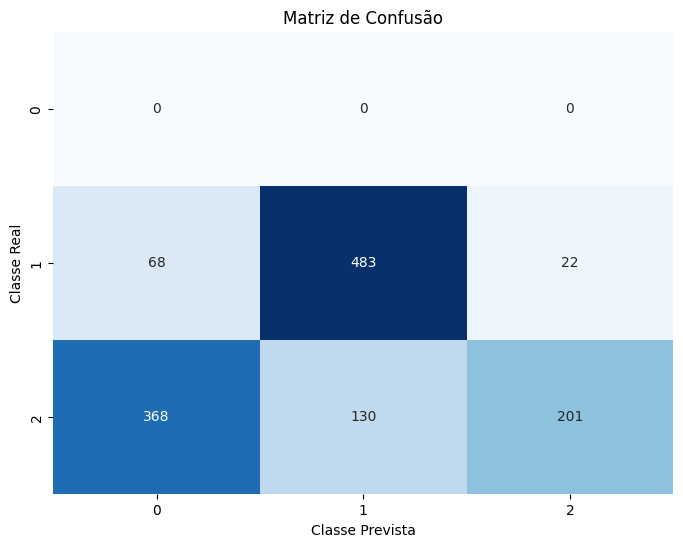

In [33]:
#Aplicado no dataframe original
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

encoder = LabelEncoder()
sentimento_numerico = encoder.fit_transform(cleaning_output['sentimento'])

# Dividir os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_array, sentimento_numerico, test_size=0.2, random_state=42)

# Criar e treinar o modelo Naive Bayes
modelo = MultinomialNB()
modelo.fit(X_treino, y_treino)

# Fazer a predição usando os dados de teste
predicao_numerica = modelo.predict(X_teste)

# Decodificar as classes preditas
predicao = encoder.inverse_transform(predicao_numerica)

# Avaliar a acurácia do modelo
acuracia = (predicao == cleaning_output['sentimento'].iloc[y_teste]).mean()
print('Acurácia:', acuracia)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(cleaning_output['sentimento'].iloc[y_teste], predicao)

# Calcular o recall
recall = recall_score(cleaning_output['sentimento'].iloc[y_teste], predicao, average='weighted')
print('Recall:', recall)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


Aplicado com o dataframe de sentimentos revistos

Acurácia: 0.6957671957671958
Recall: 0.6957671957671958


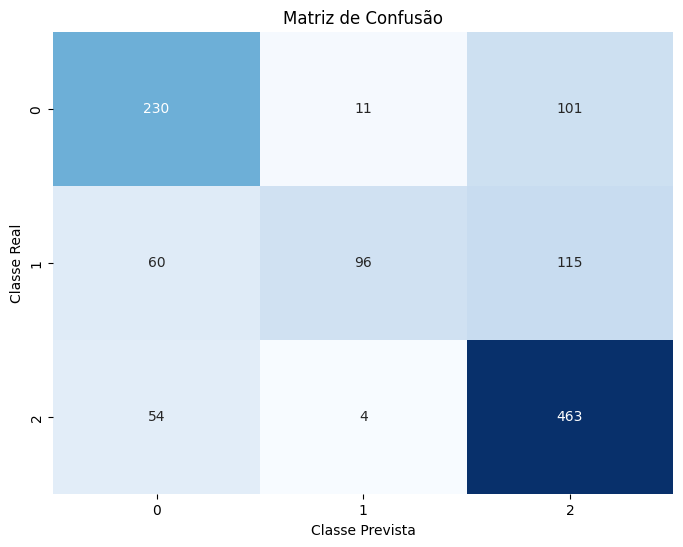

In [34]:
#Aplicado no dataframe com sentimentos revistos
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

sentimento_numerico = df_sentimento_revisto['sentimento_revisto']

# Dividir os dados em treino e teste
X_treino, X_teste, y_treino, y_teste = train_test_split(tfidf_array2, sentimento_numerico, test_size=0.2, random_state=42)

# Criar e treinar o modelo Naive Bayes
modelo = MultinomialNB()
modelo.fit(X_treino, y_treino)

# Fazer a predição usando os dados de teste
predicao = modelo.predict(X_teste)

# Avaliar a acurácia do modelo
acuracia = (predicao == y_teste).mean()
print('Acurácia:', acuracia)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(y_teste, predicao)

# Calcular o recall
recall = recall_score(y_teste, predicao, average='weighted')
print('Recall:', recall)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


Modelo que utiliza validação cruzada (5 vezes) para treinar e testar o modelo

Aplicado com o dataframe de sentimentos original

Recall médio: 0.7136176049340707


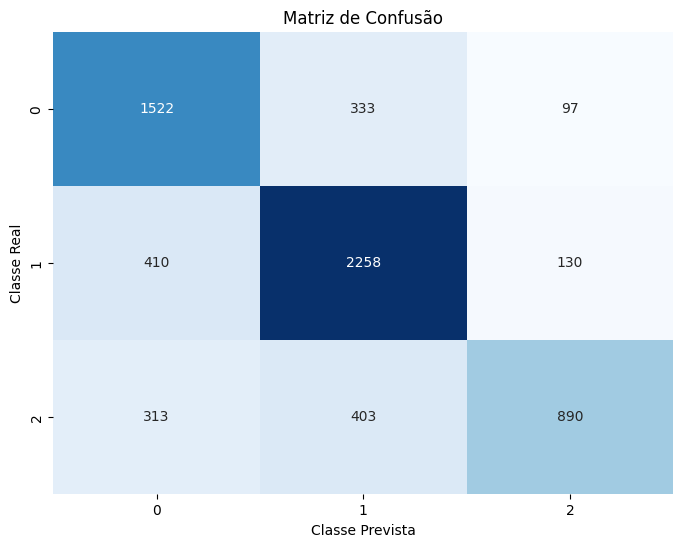

In [35]:
#Aplicado no dataframe original
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

encoder = LabelEncoder()
sentimento_numerico = encoder.fit_transform(cleaning_output['sentimento'])

# Criar o modelo Naive Bayes
modelo = MultinomialNB()

# Avaliar o modelo usando validação cruzada
scores = cross_val_score(modelo, tfidf_array, sentimento_numerico, cv=5, scoring='recall_macro')

# Exibir a acurácia média do modelo
print('Recall médio:', scores.mean())

# Realizar a predição usando validação cruzada
predicoes = cross_val_predict(modelo, tfidf_array, sentimento_numerico, cv=5)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(sentimento_numerico, predicoes)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


Aplicado com o dataframe de sentimentos revistos

Recall médio: 0.5686205420954499


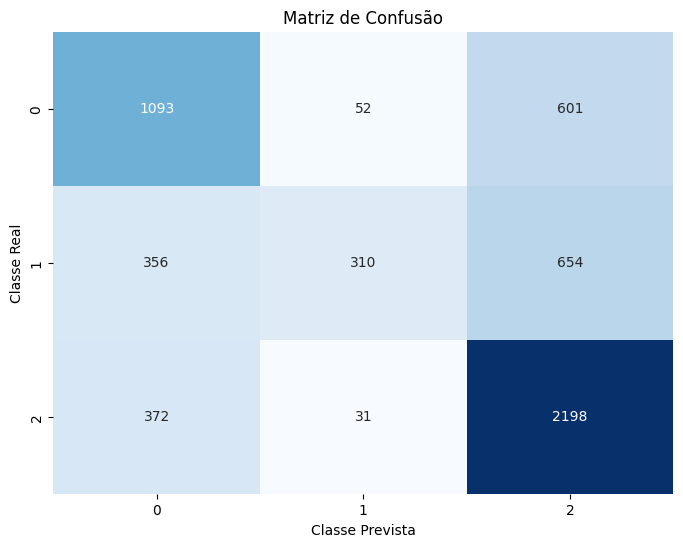

In [36]:
#Aplicado no dataframe com sentimento revisto
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

encoder = LabelEncoder()
sentimento_numerico = encoder.fit_transform(df_sentimento_revisto['sentimento_revisto'])

# Criar o modelo Naive Bayes
modelo = MultinomialNB()

# Avaliar o modelo usando validação cruzada
scores = cross_val_score(modelo, tfidf_array2, sentimento_numerico, cv=5, scoring='recall_macro')

# Exibir a acurácia média do modelo
print('Recall médio:', scores.mean())

# Realizar a predição usando validação cruzada
predicoes = cross_val_predict(modelo, tfidf_array2, sentimento_numerico, cv=5)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(sentimento_numerico, predicoes)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


Utilização do GridSearch com validação cruzada para o modelo

Aplicado com o dataframe de sentimentos original

Melhores parâmetros:
{'alpha': 0.1}
Recall médio: 0.7177717917978291


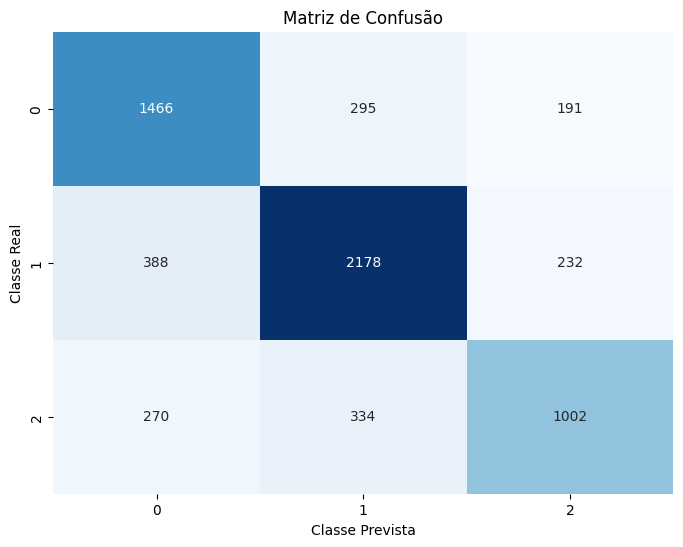

In [37]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

encoder = LabelEncoder()
sentimento_numerico = encoder.fit_transform(cleaning_output['sentimento'])


# Criar o modelo Naive Bayes
modelo = MultinomialNB()

# Definir os parâmetros que serão testados
parametros = {
    'alpha': [0.1, 1.0],  # Valores diferentes para o parâmetro alpha do Naive Bayes
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(modelo, parametros, cv=5, scoring='recall_macro')

# Realizar a busca em grade
grid_search.fit(tfidf_array, sentimento_numerico)

# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros:")
print(grid_search.best_params_)

# Avaliar o modelo usando validação cruzada com os melhores parâmetros
modelo_final = grid_search.best_estimator_
scores = cross_val_score(modelo_final, tfidf_array, sentimento_numerico, cv=5, scoring='recall_macro')

# Exibir a recall média do modelo
print('Recall médio:', scores.mean())

# Realizar a predição usando validação cruzada
predicoes = cross_val_predict(modelo_final, tfidf_array, sentimento_numerico, cv=5)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(sentimento_numerico, predicoes)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


Aplicado no dataframe de sentimentos revistos

Melhores parâmetros:
{'alpha': 0.1}
Recall médio: 0.6043984256917178


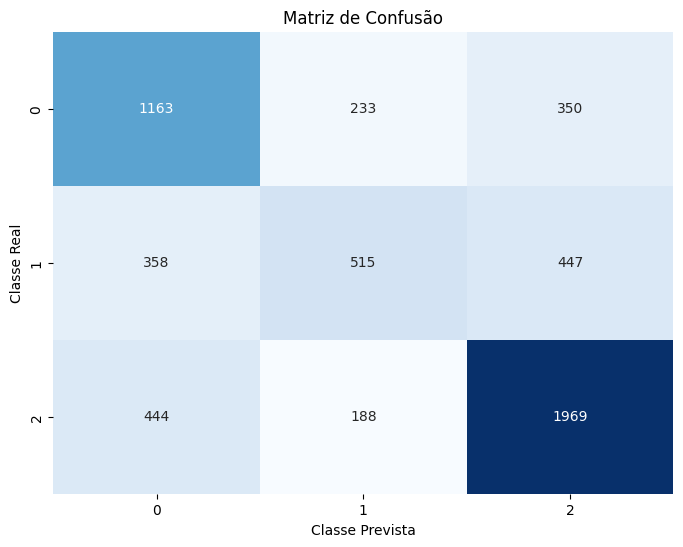

In [38]:
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV, cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

sentimento_numerico = df_sentimento_revisto['sentimento_revisto']

# Criar o modelo Naive Bayes
modelo = MultinomialNB()

# Definir os parâmetros que serão testados
parametros = {
    'alpha': [0.1, 1.0],  # Valores diferentes para o parâmetro alpha do Naive Bayes
}

# Criar o objeto GridSearchCV
grid_search = GridSearchCV(modelo, parametros, cv=5, scoring='recall_macro')

# Realizar a busca em grade
grid_search.fit(tfidf_array2, sentimento_numerico)

# Exibir os melhores parâmetros encontrados
print("Melhores parâmetros:")
print(grid_search.best_params_)

# Avaliar o modelo usando validação cruzada com os melhores parâmetros
modelo_final = grid_search.best_estimator_
scores = cross_val_score(modelo_final, tfidf_array2, sentimento_numerico, cv=5, scoring='recall_macro')

# Exibir a recall média do modelo
print('Recall médio:', scores.mean())

# Realizar a predição usando validação cruzada
predicoes = cross_val_predict(modelo_final, tfidf_array2, sentimento_numerico, cv=5)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(sentimento_numerico, predicoes)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


## Random Forest

O Random Forest é um modelo que combina várias árvores de decisão individuais para fazer previsões, em que cada árvore de decisão é treinada em uma amostra aleatória do conjunto de dados, usando uma combinação aleatória de recursos. Em seguida, as previsões de cada árvore são combinadas para produzir uma previsão final.

Aplicado com o dataframe original

In [ ]:
#Aplicado no dataframe com sentimento revisto
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

sentimento_numerico = cleaning_output['sentimento']

# Criar o modelo Random Forest
modelo = RandomForestClassifier()

# Avaliar o modelo usando validação cruzada
scores = cross_val_score(modelo, tfidf_array, sentimento_numerico, cv=5, scoring='recall_macro')

# Exibir a acurácia média do modelo
print('Recall médio:', scores.mean())

# Realizar a predição usando validação cruzada
predicoes = cross_val_predict(modelo, tfidf_array, sentimento_numerico, cv=5)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(sentimento_numerico, predicoes)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


Aplicado com o dataframe de sentimentos revistos

In [ ]:
#Aplicado no dataframe com sentimento revisto
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import confusion_matrix, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

sentimento_numerico = df_sentimento_revisto['sentimento_revisto']

# Criar o modelo Random Forest
modelo = RandomForestClassifier()

# Avaliar o modelo usando validação cruzada
scores = cross_val_score(modelo, tfidf_array2, sentimento_numerico, cv=5, scoring='recall_macro')

# Exibir a acurácia média do modelo
print('Recall médio:', scores.mean())

# Realizar a predição usando validação cruzada
predicoes = cross_val_predict(modelo, tfidf_array2, sentimento_numerico, cv=5)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(sentimento_numerico, predicoes)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


# Modelagem com Rede Neural

A arquitetura da rede neural consiste em duas camadas densas, sendo a primeira camada, com 64 unidades e ativação ReLU, é responsável por processar a entrada, que é a matriz densa resultante do Bag of Words. A segunda camada é a camada de saída, com uma única unidade e ativação sigmoid, que produz uma saída binária para indicar a classificação do sentimento (positivo ou negativo).

Após definir a arquitetura da rede neural, o modelo é compilado com um otimizador Adam, uma função de perda de entropia cruzada binária e uma métrica de acurácia.

Após o treinamento, o modelo é usado para fazer predições nas mesmas amostras de entrada e calcular as probabilidades de pertencer a cada classe de sentimento. Em seguida, essas probabilidades são convertidas em previsões binárias usando um limiar de 0.5. 

Aplicado com o dataframe de sentimentos original

In [ ]:
#Aplicando com dataframe original
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import CountVectorizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

encoder = LabelEncoder()
sentimento_numerico = encoder.fit_transform(cleaning_output['sentimento'])

# Converte o Bag of Words em uma matriz densa
vectorizer = CountVectorizer()
bow_representation = vectorizer.fit_transform(cleaning_output['texto'])
# bow_array = bow_representation.toarray()

# Obtém o número de recursos (colunas) da matriz densa
num_features = tfidf_array.shape[1]
labels = sentimento_numerico

# Definir a arquitetura da rede neural
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=num_features))  # Camada de entrada
model.add(Dense(1, activation='sigmoid'))  # Camada de saída

# Compilar o modelo com ajuste de hiperparâmetros
learning_rate = 0.001  # Taxa de aprendizado
batch_size = 64  # Tamanho do lote
epochs = 20  # Número de épocas

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo usando a matriz densa do Bag of Words
model.fit(bow_array, labels, epochs=epochs, batch_size=batch_size)

from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fazer a predição
probabilidades = model.predict(bow_array)
predicoes = (probabilidades > 0.5).astype(int)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(labels, predicoes)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()

Aplicado com o dataframe de sentimentos revistos

## Random forest

In [ ]:
#Aplicando com dataframe com sentimento revisto
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

# Converte a representação esparsa do Bag of Words em uma matriz densa
# bow_array = bow_representation2.toarray()

# Obtém o número de recursos (colunas) da matriz densa
num_features = tfidf_array2.shape[1]
labels = df_sentimento_revisto['sentimento_revisto']

# Definir a arquitetura da rede neural
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=num_features))  # Camada de entrada
model.add(Dense(1, activation='sigmoid'))  # Camada de saída

# Compilar o modelo com ajuste de hiperparâmetros
learning_rate = 0.001  # Taxa de aprendizado
batch_size = 64  # Tamanho do lote
epochs = 30  # Número de épocas

optimizer = Adam(learning_rate=learning_rate)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Treinar o modelo usando a matriz densa do Bag of Words
model.fit(bow_array, labels, epochs=epochs, batch_size=batch_size)
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fazer a predição
probabilidades = model.predict(bow_array)
predicoes = (probabilidades > 0.5).astype(int)

# Calcular a matriz de confusão
matriz_confusao = confusion_matrix(labels, predicoes)

# Exibir a matriz de confusão visualmente
plt.figure(figsize=(8, 6))
sns.heatmap(matriz_confusao, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Classe Prevista')
plt.ylabel('Classe Real')
plt.title('Matriz de Confusão')
plt.show()


# Comparações dos modelos

Todos os modelos utilizou-se as métricas de acurácia e recall para a analisar qual modelo e técnica teve melhores resultados para o TF-IDF. Também foi aplicada a matriz de confusão para visualizar melhor os falsos positivos e negativos para os testes dos modelos para melhores análises

In [ ]:
pip install tabulate

In [7]:
from tabulate import tabulate

# Dados para a tabela
dados = [
    ["Naive Bayes Simples", 'Original', 54, 54],
    ["Naive Bayes Simples", 'Revisto', 70, 70],
    ["Naive Bayes com cross validation", "Original", 72 , 72],
    ["Naive Bayes com cross validation", "Revisto", 61 , 61],
    ["Naive Bayes com Grid Search e Cross Validation", "Original", 72, 70],
    ["Naive Bayes com Grid Search e Cross Validation","Revisto", 0, 0],
    ["Random Forest", "Original", 0, 0],
    ["Random Forest", "Revisto", 61, 61],
    ["Rede Neural", "Original", 58, 'Null'],
    ["Rede Neural", "Revisto", 47, 'Null']

]

# Cabeçalho da tabela
cabecalho = ["Modelo", "Dataset", "Acurácia", "Recall"]

# Exibir a tabela formatada
print(tabulate(dados, headers=cabecalho, tablefmt="fancy_grid"))


╒════════════════════════════════════════════════╤═══════════╤════════════╤══════════╕
│ Modelo                                         │ Dataset   │   Acurácia │   Recall │
╞════════════════════════════════════════════════╪═══════════╪════════════╪══════════╡
│ Naive Bayes Simples                            │ Original  │         54 │       54 │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes Simples                            │ Revisto   │         70 │       70 │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com cross validation               │ Original  │         72 │       72 │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com cross validation               │ Revisto   │         61 │       61 │
├────────────────────────────────────────────────┼───────────┼────────────┼──────────┤
│ Naive Bayes com Grid Search e Cross Valid